In [7]:
import pandas as pd
import numpy as np
import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import winsound
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)



df = pd.read_csv('dataset.csv')
del df['Unnamed: 0']

s = df['name']
s = list(sorted(set(s)))

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 20
# data1 = df[df['name']==s[0]]
data1 = df[df['name']==s[0]]
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

                date  number       name div      a
3917080   2010-01-15   340.0  가락시장(340)  승차    0.0
3917081   2010-01-15   340.0  가락시장(340)  승차    0.0
3917082   2010-01-15   340.0  가락시장(340)  승차    0.0
3917083   2010-01-15   340.0  가락시장(340)  승차    0.0
3917084   2010-01-15   340.0  가락시장(340)  승차    0.0
3917085   2010-01-15   340.0  가락시장(340)  승차    0.0
3917086   2010-01-15   340.0  가락시장(340)  승차    0.0
3917087   2010-01-15   340.0  가락시장(340)  승차    1.0
3917088   2010-01-15   340.0  가락시장(340)  승차    0.0
3917089   2010-01-15   340.0  가락시장(340)  승차    1.0
3917090   2010-01-15   340.0  가락시장(340)  승차    1.0
3917091   2010-01-15   340.0  가락시장(340)  승차    1.0
3917092   2010-01-15   340.0  가락시장(340)  승차   -1.0
3917093   2010-01-15   340.0  가락시장(340)  승차    0.0
3917094   2010-01-15   340.0  가락시장(340)  승차    0.0
3917095   2010-01-15   340.0  가락시장(340)  승차    0.0
3917096   2010-01-15   340.0  가락시장(340)  승차   -1.0
3917097   2010-01-15   340.0  가락시장(340)  승차    0.0
3917098   2010-01-15   340.0  가

In [8]:
s

['가락시장(340)',
 '가락시장(8)',
 '가산디지털단지(7)',
 '강남(222)',
 '강남구청',
 '강동',
 '강동구청',
 '강변(214)',
 '개롱',
 '개화산',
 '거여',
 '건대입구(212)',
 '건대입구(7)',
 '경복궁(317)',
 '경찰병원(341)',
 '고덕',
 '고려대',
 '고속터미널(329)',
 '고속터미널(7)',
 '공덕(5)',
 '공덕(6)',
 '공릉',
 '광나루',
 '광명사거리',
 '광화문',
 '광흥창',
 '교대(223)',
 '교대(330)',
 '구로디지털단지(232)',
 '구산',
 '구의(213)',
 '구파발(310)',
 '군자(5)',
 '군자(7)',
 '굴포천',
 '굽은다리',
 '금호(324)',
 '길동',
 '길음(417)',
 '김포공항(5)',
 '까치산(5)',
 '까치울',
 '낙성대(227)',
 '남구로',
 '남부터미널(331)',
 '남성',
 '남태령(434)',
 '남한산성입구',
 '내방',
 '노원(411)',
 '노원(7)',
 '녹번(313)',
 '녹사평',
 '논현',
 '단대오거리',
 '답십리',
 '당고개(409)',
 '당산(237)',
 '대림(233)',
 '대림(7)',
 '대청(337)',
 '대치(335)',
 '대흥',
 '도곡(334)',
 '도림천(247)',
 '도봉산(7)',
 '독립문(316)',
 '독바위',
 '돌곶이',
 '동대문(155)',
 '동대문(421)',
 '동대문역사문화공원(205)',
 '동대문역사문화공원(422)',
 '동대문역사문화공원5',
 '동대문운동장(205)',
 '동대문운동장(422)',
 '동대입구(322)',
 '동묘앞(159)',
 '동묘앞(6)',
 '동작(431)',
 '둔촌동',
 '디지털미디어시티(6)',
 '뚝섬(210)',
 '뚝섬유원지',
 '마곡',
 '마들',
 '마장',
 '마천',
 '마포',
 '마포구청',
 '망원',
 '매봉(333)',
 '먹골'

                date  number     name div      a
1760      2008-01-01   338.0  일원(338)  승차    6.0
1761      2008-01-01   338.0  일원(338)  승차  -69.0
1762      2008-01-01   338.0  일원(338)  승차    7.0
1763      2008-01-01   338.0  일원(338)  승차   24.0
1764      2008-01-01   338.0  일원(338)  승차   12.0
1765      2008-01-01   338.0  일원(338)  승차    0.0
1766      2008-01-01   338.0  일원(338)  승차    0.0
1767      2008-01-01   338.0  일원(338)  승차  -51.0
1768      2008-01-01   338.0  일원(338)  승차  -43.0
1769      2008-01-01   338.0  일원(338)  승차    7.0
1770      2008-01-01   338.0  일원(338)  승차   59.0
1771      2008-01-01   338.0  일원(338)  승차   62.0
1772      2008-01-01   338.0  일원(338)  승차   59.0
1773      2008-01-01   338.0  일원(338)  승차  -15.0
1774      2008-01-01   338.0  일원(338)  승차   11.0
1775      2008-01-01   338.0  일원(338)  승차  -34.0
1776      2008-01-01   338.0  일원(338)  승차  -49.0
1777      2008-01-01   338.0  일원(338)  승차  -48.0
1778      2008-01-01   338.0  일원(338)  승차  -68.0
1779      2008-01-01

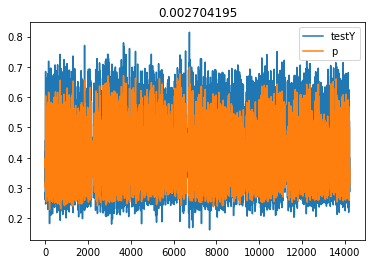

0.002704195


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# 모델 구성하기

model = Sequential()
# model.add(LSTM(32, input_shape=(None, 1), return_sequences=True))
# model.add(Dropout(0.3))

model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
# model.add(LSTM(i, input_shape=(None, 1)))

# model.add(Dense(i))
# model.add(Dropout(0.3))
# model.add(Dropout(0.3))
# model.add(Dense(64))

model.add(Dense(1))
# name = "paper.jpg"
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, epochs=1, batch_size=16, verbose=1)
p = model.predict(x_test)

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
# plt.savefig(name)
plt.show()
print(mean_squared_error(y_test, p))
# plt.clf()

In [5]:
p
p.shape

(14224, 1)

In [ ]:
data1 = df[df['name']==s[0]]
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]

